In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = '/Users/amirrezakamkar/Desktop/Works_in_progress/Ironhack/5_5th_week/Project/2nd_project/data/clean/combined_data_control.txt'
df = pd.read_csv(url)

In [21]:
df.head(20)

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,next_step,is_step_back
8,1028,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,step_1,False
7,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,step_1,False
6,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,step_2,False
5,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,step_3,False
4,1028,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,step_1,True
3,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:59:55,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,step_1,False
2,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 19:00:15,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,step_2,False
1,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 19:00:17,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,step_1,True
0,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 19:00:26,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,NaN,False
9,1104,194240915_18158000533,543158812_46395476577_767725,start,2017-06-12 07:49:18,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0,Control,start,False


In [17]:
df['date_time'] = pd.to_datetime(df['date_time'])

# Sort by client_id and date_time to ensure the steps are in chronological order
df = df.sort_values(by=['client_id', 'date_time'])

# Define the process steps in the correct order
process_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Create a new column that shows the next step
df['next_step'] = df.groupby('client_id')['process_step'].shift(-1)

# Create a column to identify "step back" (where the next step is lower in the process order)
df['is_step_back'] = df.apply(lambda row: process_order.index(row['next_step']) < process_order.index(row['process_step']) 
                              if pd.notnull(row['next_step']) else False, axis=1)

# Count the number of "step back" errors
step_back_errors = df['is_step_back'].sum()

# Display the rows with step back errors
step_back_rows = df[df['is_step_back'] == True]

print(f"Number of step back errors: {step_back_errors}")
step_back_rows

Number of step back errors: 13297


,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,next_step,is_step_back
4,1028,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,step_1,True
1,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 19:00:17,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,step_1,True
23,1197,753759429_54481946928,71862471_21202285428_848395,step_3,2017-04-01 17:17:25,7.0,85.0,28.5,U,5.0,177062.14,5.0,8.0,Control,step_2,True
32,3647,742136411_92170694666,53540785_76819002881_890663,step_3,2017-06-01 15:57:33,15.0,190.0,63.0,F,2.0,154244.15,4.0,7.0,Control,start,True
41,5354,233679354_36495397627,192604721_14077630095_819213,confirm,2017-04-12 20:31:31,4.0,58.0,50.5,U,2.0,62282.38,2.0,5.0,Control,start,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140447,9997391,494669706_3354361161,84654768_90613632047_633963,step_3,2017-04-05 15:41:17,4.0,52.0,60.0,U,2.0,77291.01,6.0,9.0,Control,step_2,True
140466,9997470,395791369_55562604618,761490147_96352537762_21814,step_1,2017-05-09 15:58:31,6.0,82.0,36.0,U,2.0,53543.03,0.0,3.0,Control,start,True
140464,9997470,395791369_55562604618,761490147_96352537762_21814,step_1,2017-05-09 16:00:30,6.0,82.0,36.0,U,2.0,53543.03,0.0,3.0,Control,start,True
140460,9997470,395791369_55562604618,761490147_96352537762_21814,step_3,2017-05-09 16:04:17,6.0,82.0,36.0,U,2.0,53543.03,0.0,3.0,Control,start,True


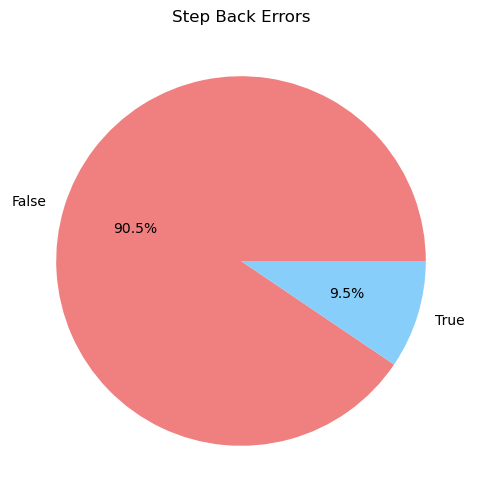

In [19]:
step_back_counts = df['is_step_back'].value_counts()

# Plot pie chart for step back counts
plt.figure(figsize=(6,6))
plt.pie(step_back_counts, labels=step_back_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Step Back Errors')
plt.savefig('control_step_back_errors_pie_chart.png', format='png')